# Type 1 error vs Type 2 error vs Power of the Test

<Figure size 432x288 with 0 Axes>

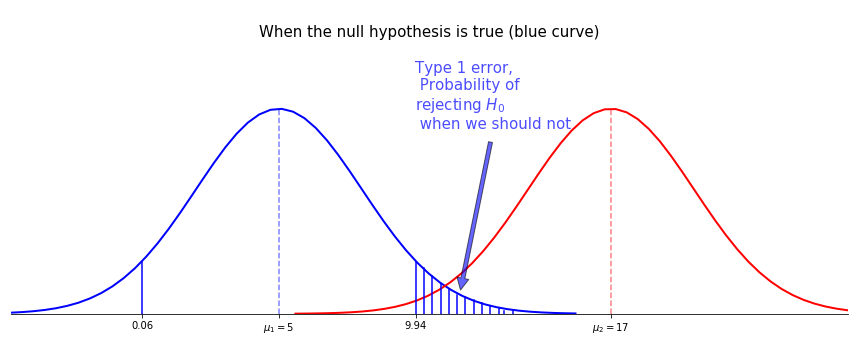

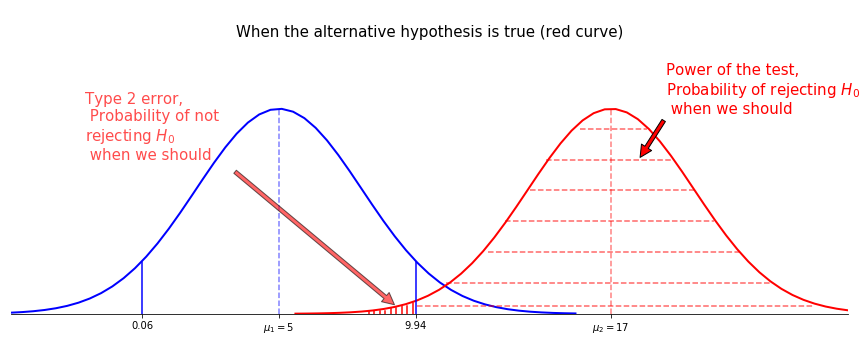

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.reset_orig()
plt.clf()

s1_mean, s1_std = 5, 3
s2_mean, s2_std = 17, 3

np.random.seed(123)
s1 = np.random.normal(s1_mean, s1_std, size=1000)
s2 = np.random.normal(s2_mean, s2_std, size=1000)
alpha = 0.1
z_score = 1.645            # from z-table. When alpha=0.1, we are looking for the 95% probability in the table
x1 = round(-z_score * s1_std + s1_mean, 2)  # from z = (x-mean)/sigma
x2 = round(z_score * s1_std + s1_mean, 2)   # from z = (x+mean)/sigma
 
## When the null hypothesis is true (plot type 1 error)
plt.figure(figsize=(15, 5))

## normal curves
count1, bins1, ignored1 = plt.hist(s1, bins=50, density=True, histtype='step', color='white')
_ = plt.plot(bins1,
             1/(s1_std * np.sqrt(2 * np.pi)) * np.exp( - (bins1 - s1_mean)**2 / (2 * s1_std**2) ),
             linewidth=2, 
             color='b')

count2, bins2, ignored2 = plt.hist(s2, bins=50, density=True, histtype='step', color='white')
_= plt.plot(bins2, 
            1/(s2_std * np.sqrt(2 * np.pi)) * np.exp( - (bins2 - s2_mean)**2 / (2 * s2_std**2) ),
            linewidth=2, 
            color='r')

## frame and axes visability
_ = plt.gca().axes.get_yaxis().set_visible(False)
_= plt.gca().spines['top'].set_visible(False)
_= plt.gca().spines['left'].set_visible(False)
_= plt.gca().spines['right'].set_visible(False)

## x limits and xticks
_ = plt.xlim(min(s1), max(s2))
_ = plt.xticks((x1, s1_mean, x2, s2_mean))
_ = plt.gca().set_xticklabels((x1, '$\mu_1 = {}$'.format(s1_mean), 
                               x2, '$\mu_2 = {}$'.format(s2_mean)))

## vertical lines
_ = plt.axvline(s1_mean, ymax=0.75, color='b', linestyle='--', alpha=0.5)
_ = plt.axvline(s2_mean, ymax=0.75, color='r', linestyle='--', alpha=0.5)
_ = plt.axvline(x1, ymax=0.19, color='b')
_ = plt.axvline(x2, ymax=0.19, color='b')

## fill in with lines to note the probability of rejecting H0 when we shouldn't (type 1 error)
## NOTE: I am sure there is a better way of filling in under the curve. 
##       But after some time of searching, it doesn't seem to be streightforward.
##       That's why I am manually plotting several lines.
##       And I like the simple look of the lines.
x_coords_2 = [x2+0.3, x2+0.6, x2+0.9, x2+1.2, x2+1.5, x2+1.8, x2+2.1, x2+2.4, x2+2.7, x2+3, x2+3.2, x2+3.5]
y_heights_2 = [0.17, 0.14, 0.11, 0.09, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.009]

for (x, y) in zip(x_coords_2, y_heights_2):
    _ = plt.axvline(x, ymax=y, color='b')

## annotate
_ = plt.annotate('Type 1 error,\n Probability of \nrejecting $H_0$\n when we should not', 
                 xy=(11.5, 0.01), xytext=(9.9, 0.12),
                 arrowprops=dict(facecolor='b', shrink=0.05, alpha=0.6), 
                 fontsize=15, 
                 color='b',
                 alpha=0.7)


_ = plt.title("\nWhen the null hypothesis is true (blue curve)",
              fontsize=15)

## When the alternative hypothesis is true (plot type 2 error and power of the test)
plt.figure(figsize=(15, 5))
    
    
## normal curves
count1, bins1, ignored1 = plt.hist(s1, bins=50, density=True, histtype='step', color='white')
_ = plt.plot(bins1,
             1/(s1_std * np.sqrt(2 * np.pi)) * np.exp( - (bins1 - s1_mean)**2 / (2 * s1_std**2) ),
             linewidth=2, 
             color='b')

count2, bins2, ignored2 = plt.hist(s2, bins=50, density=True, histtype='step', color='white')
_= plt.plot(bins2, 
            1/(s2_std * np.sqrt(2 * np.pi)) * np.exp( - (bins2 - s2_mean)**2 / (2 * s2_std**2) ),
            linewidth=2, 
            color='r')

## frame and axes visability
_ = plt.gca().axes.get_yaxis().set_visible(False)
_ = plt.gca().spines['top'].set_visible(False)
_ = plt.gca().spines['left'].set_visible(False)
_ = plt.gca().spines['right'].set_visible(False)

## x limits and xticks
_ = plt.xlim(min(s1), max(s2))
_ = plt.xticks((x1, s1_mean, x2, s2_mean))
_ = plt.gca().set_xticklabels((x1, '$\mu_1 = {}$'.format(s1_mean), 
                               x2, '$\mu_2 = {}$'.format(s2_mean)))

## vertical lines
_ = plt.axvline(s1_mean, ymax=0.75, color='b', linestyle='--', alpha=0.5)
_ = plt.axvline(s2_mean, ymax=0.75, color='r', linestyle='--', alpha=0.5)
_ = plt.axvline(x1, ymax=0.19, color='b')
_ = plt.axvline(x2, ymax=0.19, color='b')

## fill in with lines to note the probability of not rejecting H0 when we should (type 2 error)
## NOTE: I am sure there is a better way of filling in under the curve. 
##       But after some time of searching, it doesn't seem to be streightforward.
##       That's why I am manually plotting several lines.
##       And I like the simple look of the lines.
x_coords = [x2-0.1, x2-0.3, x2-0.5, x2-0.7, x2-0.9, x2-1.1, x2-1.3, x2-1.5, x2-1.7]
y_heights = [0.04, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01, 0.009, 0.009]

for (x, y) in zip(x_coords, y_heights):
    _ = plt.axvline(x, ymax=y, color='r')

## annotate
_ = plt.annotate('Type 2 error,\n Probability of not \nrejecting $H_0$\n when we should', 
                 xy=(9.5, 0.001), xytext=(-2, 0.1),
                 arrowprops=dict(facecolor='r', shrink=0.05, alpha=0.6), 
                 fontsize=15, 
                 color='r',
                 alpha=0.7)


## fill in with lines to note the power of test (the probability of rejecting H0 when we should)
y_coords = [.12, .1, .08, .06, .04, .02, .005]
x_heights_min = [.68, .64, .62, .59, .57, .52, .485]
x_heights_max = [.76, .79, .82, .84, .87, .91, .96]

for y, x_min, x_max in zip(y_coords, x_heights_min, x_heights_max):
    _ = plt.axhline(y, xmin=x_min, xmax=x_max, color='r', linestyle='--', alpha=0.6)

## annotate
_ = plt.annotate('Power of the test, \nProbability of rejecting $H_0$\n when we should',
                 xy=(18, 0.1), xytext=(19, 0.13),
                 arrowprops=dict(facecolor='r', shrink=0.05), 
                 fontsize=15, 
                 color='r')
_ = plt.title("\nWhen the alternative hypothesis is true (red curve)",
              fontsize=15)

# Mean and Median 

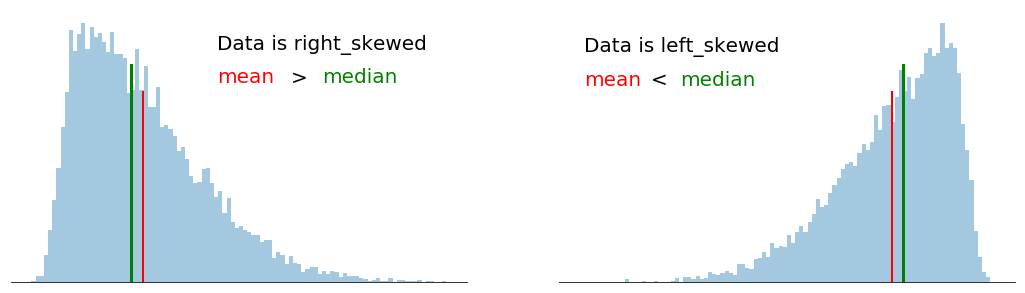

In [5]:
## Example
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,5))

## Simulate random data that are skewed to the right 
np.random.seed(2419)
a = 10
data_rightskew = skewnorm.rvs(a, size=10000)

## Plot the data with the mean and median
plt.subplot(121)

# delete the top, left, right lines and x, y axis
_ = plt.gca().axes.get_yaxis().set_visible(False)
_ = plt.gca().axes.get_xaxis().set_visible(False)
_ = plt.gca().spines['top'].set_visible(False)
_ = plt.gca().spines['left'].set_visible(False)
_ = plt.gca().spines['right'].set_visible(False)

# plot
count, bins, ignored = plt.hist(data_rightskew, bins=100, density=True, alpha=0.4)
_= plt.axvline(np.mean(data_rightskew), ymax=0.7, linewidth=2, color='r')
_= plt.axvline(np.median(data_rightskew), ymax=0.8, linewidth=3, color='green')
_= plt.annotate('Data is right_skewed', xy=(1.5, 0.7),
                fontsize=20)
_= plt.annotate('mean', xy=(1.5, 0.6),
                fontsize=20, color='r')
_= plt.annotate('>', xy=(2.2, 0.6),
                fontsize=20)
_= plt.annotate('median', xy=(2.5, 0.6),
                fontsize=20, color='g')

## Simulate random data that are skewed to the left
np.random.seed(2419)
a = -10
data_leftskew = skewnorm.rvs(a, size=10000)

## Plot the data with the mean and median
plt.subplot(122)

# delete the top, left, right lines and x, y axis
_ = plt.gca().axes.get_yaxis().set_visible(False)
_ = plt.gca().axes.get_xaxis().set_visible(False)
_ = plt.gca().spines['top'].set_visible(False)
_ = plt.gca().spines['left'].set_visible(False)
_ = plt.gca().spines['right'].set_visible(False)

# plot
count, bins, ignored = plt.hist(data_leftskew, bins=100, density=True, alpha=0.4)
_= plt.axvline(np.mean(data_leftskew), ymax=0.7, linewidth=2, color='r')
_= plt.axvline(np.median(data_leftskew), ymax=0.8, linewidth=3, color='green')
_= plt.annotate('Data is left_skewed', xy=(-4, 0.75),
                fontsize=20)
_= plt.annotate('mean', xy=(-4, 0.64),
                fontsize=20, color='r')
_= plt.annotate('<', xy=(-3.3, 0.64),
                fontsize=20)
_= plt.annotate('median', xy=(-3, 0.64),
                fontsize=20, color='g')

### Manually create 13 numbers in the range [120, 144] and with the mean=126.348

In [1]:
import numpy as np
import matplotlib.pyplot as plt

numbers = [120, 120.4, 120.5, 122.1, 122, 122.3, 123, 124, 125, 127, 132.22, 140, 144]
round(np.mean(numbers), 3)

126.348

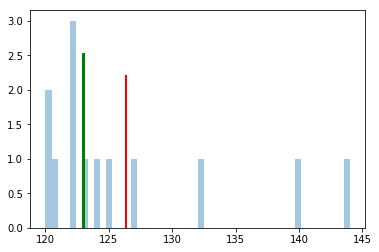

In [2]:
count, bins, ignored = plt.hist(numbers, bins=50, alpha=0.4)
_= plt.axvline(np.mean(numbers), ymax=0.7, linewidth=2, color='r')
_= plt.axvline(np.median(numbers), ymax=0.8, linewidth=3, color='green')

In [13]:
## calculate the skew
scipy.stats.skew(numbers)

1.3784687154018818